In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
from LSTM_model.train import LSTMNet

In [3]:
model = LSTMNet(input_size=5, output_size=2, hidden_size=128, dropout=0.2, model_mode='label_predict', batch_first=True)

In [7]:
model.load_state_dict(torch.load('LSTM_model/models/label_predict1.pth'))

<All keys matched successfully>

In [4]:
import LSTM_model.train as train

In [11]:
def std_max_min(array):
    max = np.nanmax(array)
    min = np.nanmin(array)
    return (array - min) / (max - min)

In [321]:
class Moving_average():
    def __init__(self, n_window):
        self.n_window = n_window
    
    def __call__(self, rate_data, sd_idx):
        #paddingすることで移動平均した配列をpast_numと同じ大きさ（n_windowが偶数なら1大きい）の配列にしている
        move_average = np.pad(rate_data[: sd_idx+1], self.n_window//2, 'reflect')
        move_average = np.convolve(move_average, np.ones(self.n_window), mode='valid')/self.n_window
        move_average = std_max_min(move_average)
        return move_average

In [5]:
train.Moving_average(2)

In [6]:
transoforms = [train.Log_scale(), train.Log_sub(), train.Moving_average(7), train.Moving_average(19)]

In [44]:
def make_features(input, past_num, transoforms):
    features = np.zeros([past_num, len(transoforms)+1])

    features[:, 0] = std_max_min(array = input)
    for i, transform in enumerate(transoforms):
        features[:,i+1] = transform(input, past_num-1)
    
    return torch.tensor(features[None,:,:])


In [8]:
rates = np.array(pd.read_csv('statics/train/rates.csv').loc[:, 'rate'])

In [66]:
test_rate = rates[180000:150576]

In [23]:
draw_len = 288
start_idx = 200000

In [9]:
import matplotlib.pyplot as plt

In [44]:
np.array(test_rate)[0]

4041800.0

In [ ]:
labels = np.zeros([])

In [153]:
test_rate = rates[150100:150676]
input = make_features(test_rate, transoforms)
y = model(input.float())
y

tensor([[0.2972, 0.7028]], grad_fn=<SoftmaxBackward0>)

In [154]:
model.training

False

In [63]:
x = test_rate

In [43]:
transoforms

In [79]:
model = LSTMNet(input_size=5, output_size=2, hidden_size=128, dropout=0.2, model_mode='label_predict', batch_first=True)

In [ ]:
'label_predict_weight0.4_kai.pth'

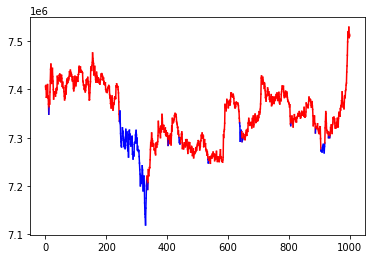

In [84]:
model.load_state_dict(torch.load('LSTM_model/models/label576_weight40_60.pth'))
model.eval()
start = 196000
draw_len = 1000
past_num = 576
y = np.arange(draw_len+2)
x = rates[start : start+draw_len+2]

for i in range(draw_len):
    past_rate = rates[start-past_num+i+1 : start+i+1]
    input = make_features(past_rate, past_num, transoforms[:4])
    label = model(input.float()).data[0][0]
    
    plt.plot(y[i:i+2], x[i:i+2] ,color= 'blue' if (label > 0.5) else 'red')

plt.show()

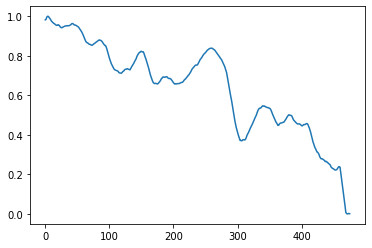

In [302]:
n_window = 21
move_average = np.pad(rates[180424: 180900], n_window//2, 'reflect')
move_average = np.convolve(move_average, np.ones(n_window), mode='valid')/n_window
move_average = std_max_min(move_average)
plt.plot(move_average)

In [205]:
torch.sum(a==0, axis=0)

tensor(4)

In [73]:
import torch.nn as nn 
criterion = nn.CrossEntropyLoss(weight=torch.tensor([0.2, 0.4, 0.4]))

In [74]:
criterion(torch.tensor([[1,1,2]]).float(),torch.tensor([[1,0,0]]).float())

tensor(0.3103)

In [76]:
criterion(torch.tensor([[1,2,1]]).float(),torch.tensor([[0, 0, 1]]).float())

tensor(0.6206)

In [227]:
criterion(torch.tensor([[3,2,1]]).float(),torch.tensor([[0,0,1]]).float())

tensor(0.7223)